# Lesson 26: Random number generation

(c) 2017 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l26_random_number_generation.ipynb).*

In [1]:
import numpy as np
import scipy.stats

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

**Random number generation** (RNG), besides being a song in the original off-Broadway run of *Hedwig and the Angry Inch*, is the process by which a string of random numbers may be drawn.  Of course, the numbers are not completely random for several reasons.

1. They are drawn from a probability distribution.  The most common one is the uniform distribution on the domain $0 \le x < 1$, i.e., random numbers between zero and one.
2. In most computer applications, including the ones we'll use in bootcamp, the random numbers are actually pseudorandom.  They depend entirely on an input **seed** and are then generated by a deterministic algorithm from that seed.

This is a bit academic.  Let's jump right in generating random numbers.  Much of the random number generation functionality you will need is in the `np.random` module.  Let's start by generating random numbers on a uniform interval

In [2]:
np.random.random(size=10)

array([ 0.24051303,  0.96375836,  0.83200013,  0.18091055,  0.20726029,
        0.76443191,  0.48738601,  0.17756008,  0.91544432,  0.31986767])

The function `random()` in the `np.random` module generates random numbers on the interval $[0,1)$.  The `size` kwarg is how many random numbers you wish to generate, and is a kwarg in all of Numpy's random number generators.  They are returned as a Numpy array.

We can check to make sure it is appropriately drawing random numbers out of the uniform distribution by plotting the cumulative distribution function, just like we did last time.  We'll generate 100,000 random numbers and plot them along with the CDF. First, we'll write a quick ECDF function to have it available.

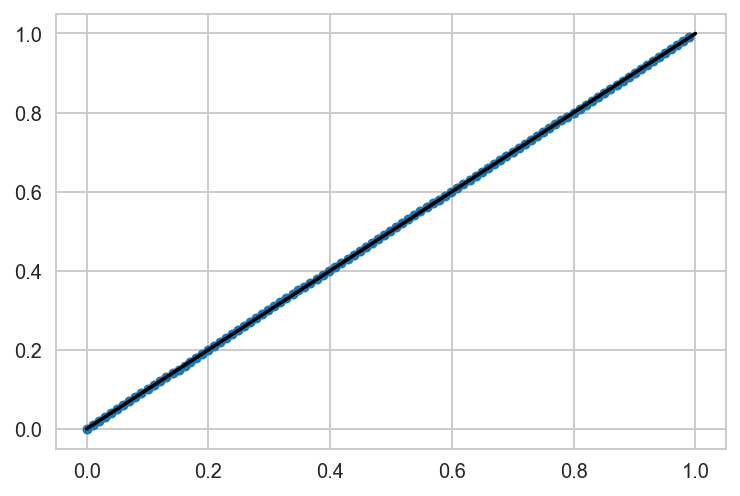

In [3]:
def ecdf(data):
    """Generate x and y values for plotting an ECDF."""
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

# Generate random numbers
x = np.random.random(size=100000)

# Make ECDF
x, y = ecdf(x)

# Plot CDF from random numbers (for plotting purposes, only plot 100 points)
fig, ax = plt.subplots(1, 1)
_ = ax.plot(x[::1000], y[::1000], marker='.', linestyle='none', markersize=10)

# Plot expected CDF (just a straight line from (0,0) to (1,1)
_ = ax.plot([0, 1], [0, 1], 'k-')

So, it looks like our random number generator is doing a good job.

Generating random numbers on the uniform interval is one of the most commonly used RNG techniques.  In fact, many of the other contexts of RNG are derived from draws from the uniform distribution.  For example, you can do "coin flips," that is random draws that are either zero or one, like this:

In [4]:
# Generate 20 random numbers on uniform interval
x = np.random.random(size=20)

# Make the coin flips
heads = x > 0.5

# Show which were heads, and count the number of heads
print(heads)
print('\nThere were', np.sum(heads), ' heads.')

[False  True False False  True  True  True  True  True  True False False
  True  True  True  True False False False False]

There were 11  heads.


## Seeding random number generators

Now, just to demonstrate that random number generation is deterministic, we will explicitly **seed** the random number generator (which is usually seeded with a number representing the date/time to avoid repeats) to show that we get the same random numbers.

In [5]:
# Seed the RNG
np.random.seed(42)

# Generate random numbers
np.random.random(size=10)

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864,
        0.15599452,  0.05808361,  0.86617615,  0.60111501,  0.70807258])

In [6]:
# Re-seed the RNG
np.random.seed(42)

# Generate random numbers
np.random.random(size=10)

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864,
        0.15599452,  0.05808361,  0.86617615,  0.60111501,  0.70807258])

The random number sequence is exactly the same.  If we choose a different seed, we get totally different random numbers.

In [7]:
# Seed with a number that is close to the answer to everything
np.random.seed(43)
np.random.random(size=10)

array([ 0.11505457,  0.60906654,  0.13339096,  0.24058962,  0.32713906,
        0.85913749,  0.66609021,  0.54116221,  0.02901382,  0.7337483 ])

If you are writing unit tests (which we will describe when we do [test driven development](l34_testing_and_tdd.html)), it is often useful to seed the random number generator to get reproducible results.

## Drawing random numbers out of other distributions

We can also draw random numbers from other probability distributions.  For example, say we wanted to draw random samples from a Normal distribution with mean $\mu$ and standard deviation  $\sigma$.

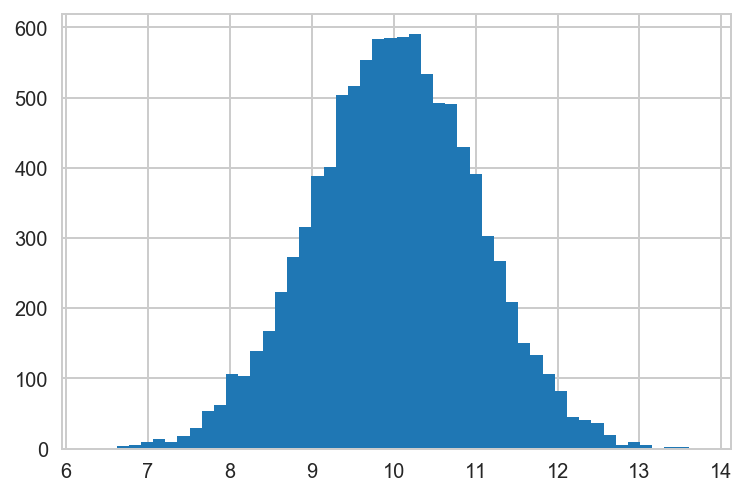

In [8]:
# Set parameters
mu = 10
sigma = 1

# Draw 10000 random samples
x = np.random.normal(mu, sigma, size=10000)

# Plot a histogram of our draws
fig, ax = plt.subplots(1, 1)
_ = ax.hist(x, bins=50)

It looks Normal, but, again, comparing the resulting ECDF is a better way to look at this.

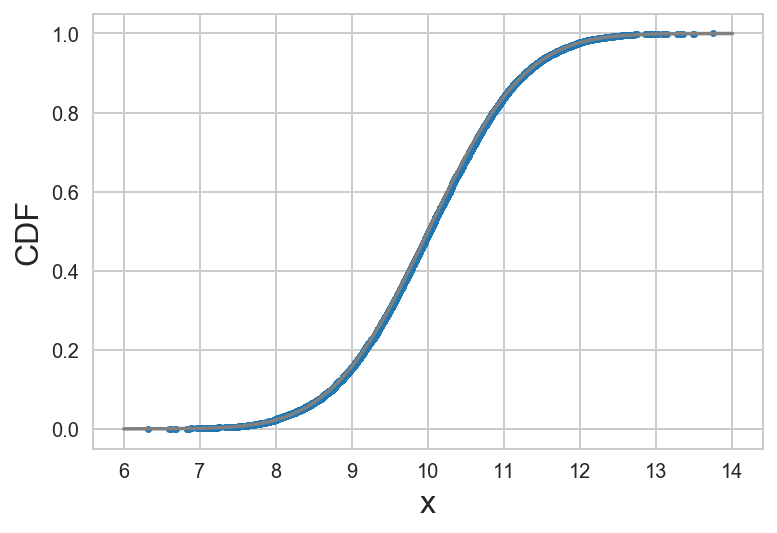

In [9]:
# Compute theoretical CDF
x_theor = np.linspace(6, 14, 400)
y_theor = scipy.stats.norm.cdf(x_theor, mu, sigma)

# Compute ECDF
x, y = ecdf(x)

# Make plot
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
_ = ax.plot(x, y, marker='.', linestyle='none')
_ = ax.plot(x_theor, y_theor, color='gray')

Yup, right on!

## Selections from discrete distributions

The random numbers we have generated so far from from continuous probability distributions.  We can also draw random numbers from discrete distributions.  We already showed how we can do this for "coin flips," but we can do it for other distributions as well. Saw we wanted to draw from a Binomial distribution. We can use `np.random.binomial()`.

In [10]:
# Draw how many coin flips land heads in 10 files
np.random.binomial(10, 0.5)

2

There are other discrete distributions we can draw from, such as Binomial, Geometric, Poisson, etc., and [the documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html) describes how to use them.

## Choosing elements from an array

It is often useful to randomly choose elements from an existing array.  The `np.random.choice()` function does this.  You equivalently could do this using `np.random.randint()`, where the integers represent indices in the array, *except* `np.random.choice()` has a great keyword argument, `replace`, which allows random draws with or without replacement.  For example, say you had 100 samples that you wanted to send to a facility for analysis, but you can only afford to send 20.  If we used `np.random.randint()`, we might have a problem.

In [11]:
np.random.seed(42)
np.random.randint(0, 51, size=20)

array([38, 28, 14, 42,  7, 20, 38, 18, 22, 10, 10, 23, 35, 39, 23,  2, 21,
        1, 23, 43])

Sample 10 was selected twice and sample 23 was selected thrice!  We can use `np.random.choice()` instead.

In [12]:
np.random.choice(np.arange(51), size=20, replace=False)

array([50, 22, 30, 16,  4, 10,  9, 41,  5, 12, 39, 18, 23, 31,  0, 28, 49,
       44,  7, 45])

Now, because we chose `replace=False`, we do not get any repeats.

### Generating random sequences
We can use the `np.random.choice()` function to generate random DNA sequences.

In [13]:
''.join(np.random.choice(list('ATGC'), replace=True, size=70))

'CTTTCTGCGCTGCATCACATGACTACCCAAAGAAAGACACCCGGGACGGAGATGTACGACCTACGGTCAG'

## Shuffling an array

Similarly, the `np.random.permutation()` function is useful.  It takes the entries in an array and shuffles them!  Let's shuffle a deck of cards.

In [14]:
np.random.permutation(np.arange(53))

array([28, 52,  7, 11, 50, 20, 42, 15, 17, 27,  5, 33, 45, 51, 31,  9,  1,
       23, 24, 37, 10, 46, 32, 29, 22, 41,  3, 19, 16,  6, 30, 18, 12, 40,
       35, 14,  8, 49, 38, 44, 25,  4, 47,  2, 13, 36, 48,  0, 34, 26, 21,
       39, 43])

## When do we need RNG?

Answer: VERY OFTEN!  We will see many examples in the next lessons and in the exercises.  

In many ways, probability is the language of biology.  Molecular processes have energetics that are comparable to the thermal energy, which means they are always influenced by random thermal forces.  The processes of the central dogma, including DNA replication, are no exceptions. This gives rise to random mutations, which are central to understanding how evolution works.  If we want to understand them, it is often useful to use random number generators to model the processes.

RNG also comes up A LOT in data analysis, which we will see in the [next lesson](l27_hackerstats.html).